Working Title: 
Household Inequities as Fundamental Cause of Child Health Disparities in Nigeria

In [1]:
set more off

(-set more- irrelevant in this version of Stata)


In [2]:
set maxvar 120000

In [3]:
log using "Log for MA Thesis", replace

(file /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health/Log
    for MA Thesis.smcl not found)
-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health
> /Log for MA Thesis.smcl
  log type:  smcl
 opened on:   4 Oct 2024, 17:00:09


In [4]:
***load data
use /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health/NGKR7BDT/NGKR7BFL.DTA

In [5]:
***keep variables of interest

use caseid v002 v190 v025 v024 v106 hw70 hw71 hw72 using "NGKR7BDT/NGKR7BFL.DTA", clear

In [6]:
describe caseid v002 v190 v025 v024 v106 hw70 hw71 hw72


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
caseid          str15   %15s                  case identification
v002            int     %8.0g                 household number
v190            byte    %8.0g      V190       wealth index combined
v025            byte    %8.0g      V025       type of place of residence
v024            byte    %8.0g      V024       region
v106            byte    %8.0g      V106       highest educational level
hw70            int     %8.0g      HW70       height/age standard deviation
                                                (new who)
hw71            int     %8.0g      HW71       weight/age standard deviation
                                                (new who)
hw72            int     %8.0g      HW72       weight/height standard deviation
                                                (new who)


In [7]:
codebook caseid v002 v190 v025 v024 v106 hw70 hw71 hw72


-------------------------------------------------------------------------------
caseid                                                      case identification
-------------------------------------------------------------------------------

                  Type: String (str15)

         Unique values: 21,792                    Missing "": 0/33,924

              Examples: "286  22  3"
                        "481  53  2"
                        "665  47  2"
                        "939  17  9"


-------------------------------------------------------------------------------
v002                                                           household number
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,274]                       Units: 1
         Unique values: 207                       Missing .: 0/33,924

                  Mean: 31.0563
             Std. dev.:  24.878

           Percen

In [8]:
***recoding household wealth index
recode v190 (1 2 = 1 "poor_households") (3 = 2 "average_households") (4 5 = 3 "rich_households"), gen(household_wealth)

(25,858 differences between v190 and household_wealth)


In [9]:
tab household_wealth


    RECODE of v190 |
     (wealth index |
         combined) |      Freq.     Percent        Cum.
-------------------+-----------------------------------
   poor_households |     15,809       46.60       46.60
average_households |      7,171       21.14       67.74
   rich_households |     10,944       32.26      100.00
-------------------+-----------------------------------
             Total |     33,924      100.00


In [10]:
***renaming other varibales for easy identification
rename v025 residence_type
rename v024 geopolitical_region
rename v106 mother_education
rename hw70 height_for_age
rename hw71 weight_for_height
rename hw72 weight_for_age

In [11]:
describe


Contains data from NGKR7BDT/NGKR7BFL.DTA
 Observations:        33,924                  
    Variables:            10                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
caseid          str15   %15s                  case identification
v002            int     %8.0g                 household number
geopolitical_~n byte    %8.0g      V024       region
residence_type  byte    %8.0g      V025       type of place of residence
mother_educat~n byte    %8.0g      V106       highest educational level
v190            byte    %8.0g      V190       wealth index combined
height_for_age  int     %8.0g      HW70       height/age standard deviation
                                                (new who)
weight_for_he~t int     %8.0g      HW71       weight/age standard deviati

In [12]:
***mean and standard devaition
eststo contractterm: quietly estpost summarize household_wealth residence_type geopolitical_region mother_education

esttab, cells("mean(fmt(%9.2fc))" sd(par)) stats(N, fmt(%9.0fc))


-------------------------
                      (1)
                         
                  mean/sd
-------------------------
household_~h         1.86
                   (0.88)
residence_~e         1.66
                   (0.48)
geopolitic~n         3.05
                   (1.53)
mother_edu~n         1.01
                   (1.04)
-------------------------
N                  33,924
-------------------------


In [13]:
***showing variation in household wealth across residence type and geopolitical regions
reg household_wealth i.residence_type, ro

margins i.residence_type, atmeans


Linear regression                               Number of obs     =     33,924
                                                F(1, 33922)       =   12875.40
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2721
                                                Root MSE          =     .74772

------------------------------------------------------------------------------
             |               Robust
household_~h | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
residence_~e |
      rural  |  -.9618039   .0084763  -113.47   0.000    -.9784177   -.9451901
       _cons |   2.486708   .0068023   365.57   0.000     2.473375    2.500041
------------------------------------------------------------------------------

Adjusted predictions                                    Number of obs = 33,92


Variables that uniquely identify margins: residence_type


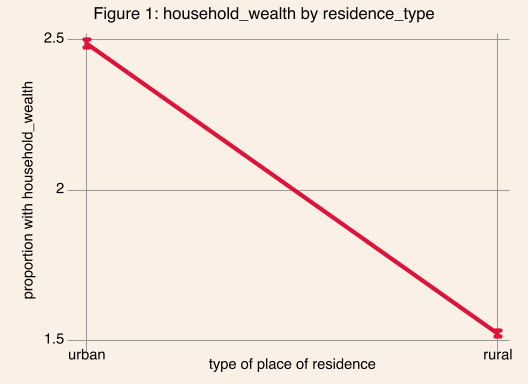

In [14]:
marginsplot, scheme(dubois) ///
title("Figure 1: household_wealth by residence_type" " ") ///
    ytitle(proportion with household_wealth)

In [15]:
reg household_wealth i.geopolitical_region, ro

margins i.geopolitical_region, atmeans


Linear regression                               Number of obs     =     33,924
                                                F(5, 33918)       =    2234.84
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2359
                                                Root MSE          =     .76612

------------------------------------------------------------------------------
             |               Robust
household_~h | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
geopolitic~n |
 north east  |  -.4799608    .014158   -33.90   0.000    -.5077109   -.4522107
 north west  |  -.4422877   .0134946   -32.78   0.000    -.4687375   -.4158379
 south east  |   .4631282   .0167056    27.72   0.000     .4303846    .4958718
south south  |   .4222151   .0177291    23.81   0.000     .3874654    .4569648


Variables that uniquely identify margins: geopolitical_region


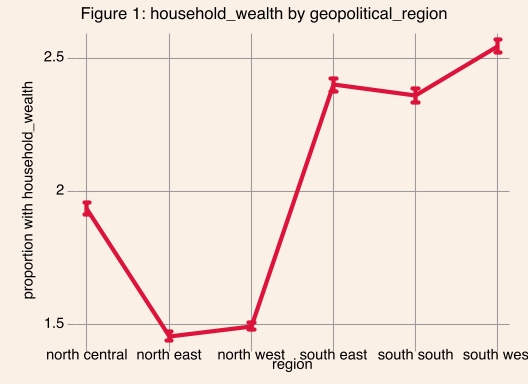

In [16]:
marginsplot, scheme(dubois) ///
title("Figure 1: household_wealth by geopolitical_region" " ") ///
    ytitle(proportion with household_wealth)

In [17]:
log close

      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health
> /Log for MA Thesis.smcl
  log type:  smcl
 closed on:   4 Oct 2024, 17:00:14
-------------------------------------------------------------------------------
